### Jupyter notebook to denormalize two data tables and to do a preliminary Exploratory Data Analysis


In [135]:
#Import the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
#Import the datasets from the folder
pwd = os.getcwd() +'\data'

rental = pd.read_csv(pwd+'\\rental.csv')
payment = pd.read_csv(pwd+'\\payment.csv')


In [137]:
drop_columns = ['customer_id']
payment = payment.drop(columns=drop_columns, axis=1)

In [138]:
drop_columns = ['last_update', 'staff_id']
rental = rental.drop(columns=drop_columns, axis=1)

In [139]:
df = pd.merge(rental, payment, on='rental_id', how='left')

In [140]:
df.shape

(16048, 9)

In [141]:
# Finding the blanks in each column
df.isnull().sum()

rental_id          0
rental_date        0
inventory_id       0
customer_id        0
return_date      183
payment_id      1452
staff_id        1452
amount          1452
payment_date    1452
dtype: int64

In [142]:
#Finding the rented days of the movies
df['rental_date'] = pd.to_datetime(df['rental_date'])
df['return_date'] = pd.to_datetime(df['return_date'])
df['rental_date'] = df['rental_date']
df['return_date'] = df['return_date']
df['rented_period'] = (df['return_date'] - df['rental_date']).dt.days

In [143]:
df.dtypes

rental_id                 int64
rental_date      datetime64[ns]
inventory_id              int64
customer_id               int64
return_date      datetime64[ns]
payment_id              float64
staff_id                float64
amount                  float64
payment_date             object
rented_period           float64
dtype: object

### Preliminary Exploratory Data Analysis

In [144]:
#Correlation between the amount for movies and rented period
correlation_matrix = df[['amount','rented_period']].corr()

In [145]:
correlation_matrix

,amount,rented_period
amount,1.000000,0.552352
rented_period,0.552352,1.000000


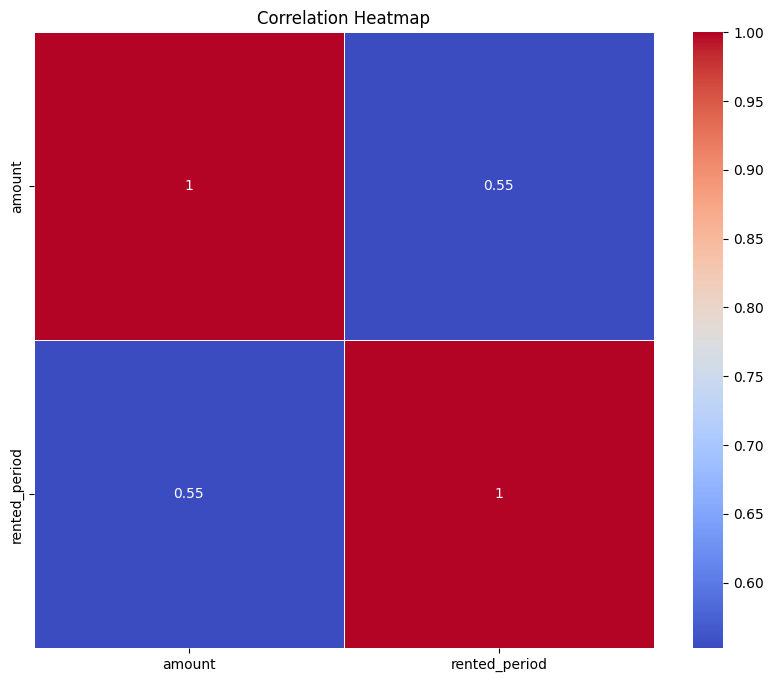

In [146]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [147]:
# the results show a median positive association between the columns.

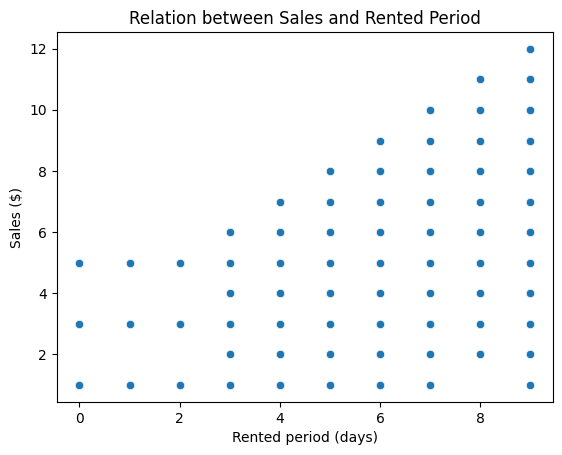

In [148]:
sns.scatterplot(x='rented_period', y='amount', data=df)

plt.xlabel('Rented period (days)')
plt.ylabel('Sales ($)')
plt.title('Relation between Sales and Rented Period')

plt.show()

In [149]:
#There is a positive trend between Sales and Rented period, which confirms the correlation between the columns.

In [150]:
summary = df.describe()

In [151]:
summary

,rental_id,rental_date,inventory_id,customer_id,return_date,payment_id,staff_id,amount,rented_period
count,16048.000000,16048,16048.000000,16048.000000,15865,14596.0000,14596.000000,14596.000000,15865.000000
mean,8024.515454,2005-07-23 08:07:28.643693952,2291.838609,297.114469,2005-07-25 23:54:53.781027328,24800.5000,1.500411,4.200606,4.527072
min,1.000000,2005-05-24 22:53:30,1.000000,1.000000,2005-05-25 23:55:21,17503.0000,1.000000,0.000000,0.000000
25%,4014.750000,2005-07-07 00:59:33,1154.750000,148.000000,2005-07-10 15:51:05,21151.7500,1.000000,2.990000,2.000000
50%,8023.500000,2005-07-28 15:54:34.500000,2291.000000,296.000000,2005-08-01 19:21:19,24800.5000,2.000000,3.990000,5.000000
75%,12036.250000,2005-08-17 21:12:21.500000,3433.000000,446.000000,2005-08-20 23:32:29,28449.2500,2.000000,4.990000,7.000000
max,16049.000000,2006-02-14 15:16:03,4581.000000,599.000000,2005-09-02 02:35:22,32098.0000,2.000000,11.990000,9.000000
std,4632.517075,NaN,1322.045864,172.441222,NaN,4213.6466,0.500017,2.368946,2.635733


In [152]:
# The average and median ticket was $4.20 and $3.99, with standard deviation of $2.36.
# The average and median rented period was of 4.5 days and 5 days with standard deviation of 2.6 days. 